# DBSCAN

## 1. DBSCAN 算法介绍

DBSCAN（Density-Based Spatial Clustering of Applications with Noise）是一种基于密度的聚类算法，用于从大量数据中识别出高密度区域并将其分为不同的簇（cluster）。与传统的基于划分的聚类算法（如 K-means）不同，DBSCAN 不需要预先指定簇的数量，并且能够识别噪声数据和异常值。

DBSCAN 的核心思想是通过密度来定义簇，它通过以下几个参数来控制聚类过程：

1. **Eps（ε）**：指定一个点的邻域范围。也就是，某个点的邻域内的其他点如果距离不超过 ε，那么这些点就属于该点的邻居。
2. **MinPts**：定义一个簇的最小点数。当一个点的邻域内包含至少 MinPts 个点时，这个点被认为是一个核心点（Core Point）。核心点是簇的中心，可以扩展成一个簇。
3. **核心点（Core Point）**：如果一个点的邻域内包含至少 MinPts 个点，那么这个点是一个核心点，并且它可以扩展成一个簇。
4. **边界点（Border Point）**：如果一个点不是核心点，但是它在某个核心点的邻域范围内，那么它被认为是边界点。
5. **噪声点（Noise Point）**：如果一个点既不是核心点也不是边界点，那么它被认为是噪声点，通常被忽略或标记为异常值。

### DBSCAN 的工作原理
1. **选择一个未被访问的点**。
2. 判断这个点是否是核心点（即是否有足够的邻居点）。如果是核心点，则该点及其邻域内的所有点形成一个簇。
3. 如果该点不是核心点，那么它被标记为噪声点，除非它能作为某个核心点的边界点而被包含到已有的簇中。
4. 重复此过程直到所有的点都被访问过。

### 优势
- **不需要预先指定簇的数量**，适用于簇的形状不规则的情况。
- **能够识别噪声**，即能够自动排除数据中的异常点。
- 适合处理大规模数据集，且对不均匀分布的簇具有良好的适应性。

### 劣势
- 对参数（特别是 ε 和 MinPts）的选择比较敏感，选择不当可能导致聚类结果不理想。
- 在高维空间中可能表现不佳，因为“邻域”在高维空间中变得不明显，容易导致聚类效果差。

总的来说，DBSCAN 是一种非常适合处理不规则形状数据和有噪声的数据集的聚类算法。

（以上内容来自 ChatGPT 4o）

In [1]:
# !pip install scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
# from sklearn.model_selection import GridSearchCV

## 2. DBSCAN 的简单示例

In [2]:
# 生成示例数据
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X.shape

(300, 2)

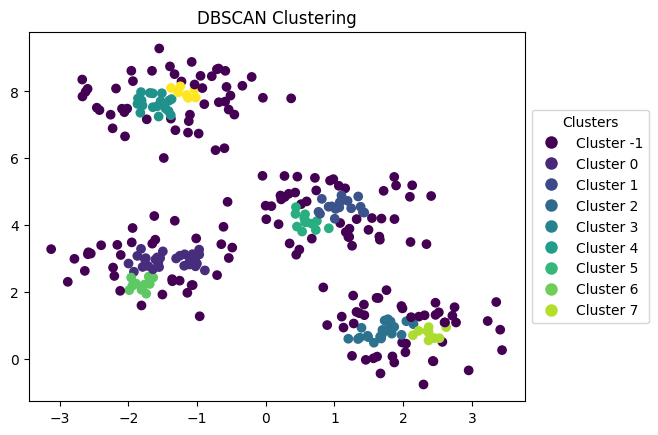

In [3]:
# 选择DBSCAN的参数
dbscan = DBSCAN(eps=0.3, min_samples=10)

# 进行聚类
dbscan.fit(X)

# 获取聚类标签
labels = dbscan.labels_

# 绘制结果
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

# 使用 set_unique_labels 来为不同的簇分配标签
unique_labels = np.unique(labels)
handles = [plt.Line2D([0], [0],
                      marker='o',
                      color='w',
                      markerfacecolor=scatter.cmap(i / len(unique_labels)),
                      markersize=10)
           for i in range(len(unique_labels))]
labels_for_legend = [f'Cluster {label}' for label in unique_labels]
plt.legend(handles, labels_for_legend, title="Clusters", loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('DBSCAN Clustering')
plt.show()

In [4]:
# 将样本和聚类结果存到一个 DataFrame
cluster_df = pd.DataFrame({
    "sample": X.tolist(),
    "label": labels.tolist()
})

cluster_df

,sample,label
0,"[0.8368568407639814, 2.1363593767535285]",-1
1,"[-1.4136580954824844, 7.409623236133461]",3
2,"[1.1552129830701285, 5.0996188654606085]",-1
3,"[-1.0186163167387894, 7.814914647322421]",7
4,"[1.2713514103916879, 1.8925420677088496]",-1
...,...,...
295,"[1.9736977010258854, 1.579798477499554]",-1
296,"[2.518341852161078, 1.3917661523161757]",-1
297,"[0.4389901418302897, 4.535928826163947]",4
298,"[0.36947865679199743, 7.791105215873345]",-1


注意：标记为 -1 的点是离群点，它们不构成一个簇。

## 3. DBSCAN 的可选参数

参数说明：

- `eps`（邻域的最大距离）：定义了一个点的邻域范围，表示在一个点的周围必须有多少其他点在距离 eps 内，才能将该点视为核心点。较小的 eps 值通常会导致较多的离群点，而较大的 eps 值会导致更多的点被归为一个簇。
- `min_samples`（核心点的最小邻居数）：定义了一个点在其邻域内至少需要有多少个点（包括它自己），才能成为核心点。min_samples 值越大，聚类结果越保守，聚类簇越小，噪声点越多。
- `metric`（距离度量方式）：定义了计算点与点之间距离的方式，常见的有 "euclidean"（欧氏距离），"manhattan"（曼哈顿距离）等。
- `algorithm`（计算方式）：可以选择不同的算法来计算距离，"auto", "ball_tree", "kd_tree", "brute"。
- `leaf_size`（树叶的大小）：在使用 ball_tree 或 kd_tree 算法时，决定了树的叶子节点的大小。适当调整此参数可以影响聚类的速度。
- `p`（用于Minkowski距离的参数）：在计算距离时，p 影响距离度量。p=2 为欧氏距离，p=1 为曼哈顿距离。
- `n_jobs`（并行作业数）：指定计算过程中使用的 CPU 核心数，-1 表示使用所有可用核心。

In [5]:
# dir(DBSCAN)
# help(DBSCAN)
# DBSCAN??

# 查看当前模型参数
dbscan.get_params()

{'algorithm': 'auto',
 'eps': 0.3,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 10,
 'n_jobs': None,
 'p': None}

## 4. DBSCAN 自动调参

### 1）基于 K 距离图选择 `eps`

> **Note:** 这种方法需要人工设置 `min_samples` 参数，但可以减少对eps参数的人工调整。

**K 距离图**：DBSCAN 中的 eps 参数控制着邻域的大小。通常通过计算每个点到其 k 个最近邻的距离来估算一个合适的 eps 值。一个常见的做法是，通过绘制每个点的 k 距离排序图（k-distance graph），寻找一个“肘部”位置来确定 eps。

具体步骤：

- 计算每个点到其 k 个最近邻的距离。
- 按照距离从小到大排序，并绘制距离图。
- 寻找图中的“肘部”，即距离增长速度开始加快的点，作为 eps 值。

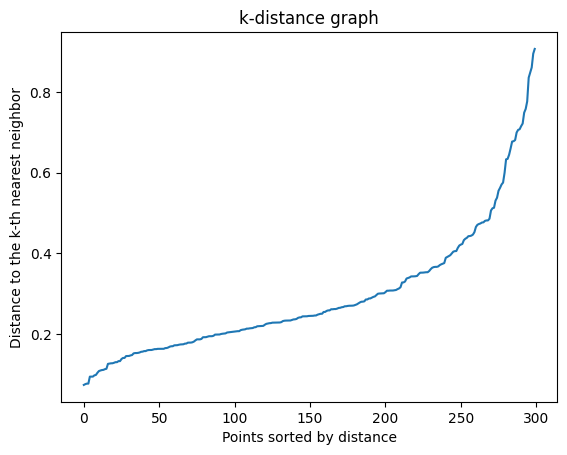

In [6]:
# 使用 NearestNeighbors 计算 k 距离
k = 4  # min_samples 设置为 4，选择其邻域的第四个最近邻
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# 计算每个点到其第 k 个最近邻的距离，并按升序排列
distances = np.sort(distances[:, k-1], axis=0)

# 绘制 k-distance 图
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Distance to the k-th nearest neighbor")
plt.show()

观察纵坐标，选择一个距离开始加快之前的距离作为 eps 值。

### 2）选择 `min_samples` 的经验法则

- `min_samples` 的定义：min_samples 定义了一个区域需要多少个相邻点才能被认为是一个密集区域，从而成为一个聚类的核心
- `min_samples` 的影响：如果 min_samples 设置得较高，DBSCAN 会找到更密集的聚类；如果设置得较低，找到的聚类会更稀疏
- 默认值：通常情况下，min_samples 的默认值是 4，这是一个常见的推荐值，尤其适用于二维数据。如果数据集的维度较高，可以考虑根据数据的大小和密度来选择 min_samples
- 基于数据集大小选择：通常，min_samples 的值应该大于数据集的维度。也有一些经验法则，例如选择大约 `min_samples = 2 * 数据维度`

### 3）使用网格搜索结合合适的评估指标（例如轮廓系数）

对于 DBSCAN，虽然没有直接的 score 方法来评估聚类效果，但你可以使用 轮廓系数（Silhouette Score）来评估聚类质量。通过网格搜索来选择不同的 eps 和 min_samples，并通过轮廓系数来评估其效果。

In [7]:
# 定义参数搜索空间
param_grid = {
    'eps': [0.5, 0.6, 0.7, 0.8, 0.9],
    'min_samples': [6, 8, 10, 12, 14]
}

# 创建 DBSCAN 实例
dbscan = DBSCAN()

# 假设 X 是你的数据集
best_score = -1  # 用于存储最佳轮廓系数
best_params = {}  # 用于存储最佳参数

# 手动进行网格搜索
for eps in param_grid['eps']:
    for min_samples in param_grid['min_samples']:
        dbscan.set_params(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # 计算轮廓系数
        if len(set(labels)) > 1:  # 确保至少有两个簇
            score = silhouette_score(X, labels)
            print(f"eps={eps}, min_samples={min_samples}, silhouette_score={score}")

            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

# 输出最佳参数
print("Best parameters found:", best_params)

eps=0.5, min_samples=6, silhouette_score=0.6200683438358626
eps=0.5, min_samples=8, silhouette_score=0.56489208019339
eps=0.5, min_samples=10, silhouette_score=0.5220954071399261
eps=0.5, min_samples=12, silhouette_score=0.4816696289192471
eps=0.5, min_samples=14, silhouette_score=0.4269308172521742
eps=0.6, min_samples=6, silhouette_score=0.648022883915022
eps=0.6, min_samples=8, silhouette_score=0.6354629568591552
eps=0.6, min_samples=10, silhouette_score=0.6059685109566673
eps=0.6, min_samples=12, silhouette_score=0.5980458501261704
eps=0.6, min_samples=14, silhouette_score=0.5707659978087178
eps=0.7, min_samples=6, silhouette_score=0.6571788748454933
eps=0.7, min_samples=8, silhouette_score=0.6567076039431102
eps=0.7, min_samples=10, silhouette_score=0.6569398552813946
eps=0.7, min_samples=12, silhouette_score=0.634517927213211
eps=0.7, min_samples=14, silhouette_score=0.6292573817738529
eps=0.8, min_samples=6, silhouette_score=0.5785275686923154
eps=0.8, min_samples=8, silhouette_

## 5. 使用 `best_params` 进行聚类

使用调参后的参数进行聚类。

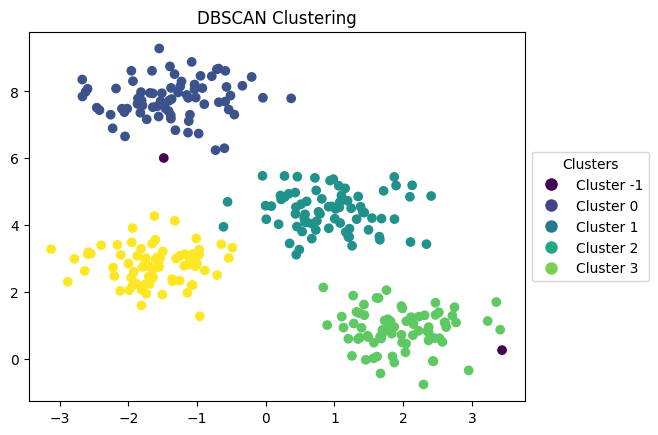

In [8]:
# 选择DBSCAN的参数
dbscan = DBSCAN(**best_params)

# 进行聚类
dbscan.fit(X)

# 获取聚类标签
labels = dbscan.labels_

# 绘制结果
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

# 使用 set_unique_labels 来为不同的簇分配标签
unique_labels = np.unique(labels)
handles = [plt.Line2D([0], [0],
                      marker='o',
                      color='w',
                      markerfacecolor=scatter.cmap(i / len(unique_labels)),
                      markersize=10)
           for i in range(len(unique_labels))]
labels_for_legend = [f'Cluster {label}' for label in unique_labels]
plt.legend(handles, labels_for_legend, title="Clusters", loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('DBSCAN Clustering')
plt.show()

## 6. 一站式 DBSCAN 函数

写一个自动调参并绘图的 DBSCAN 函数。

In [9]:
def get_best_params(data, param_grid=None, verbose=False):
    """获取 DBSCAN 的最佳参数"""
    # 如果没有初始化 param_grid
    if param_grid is None:
        param_grid = {
            'eps': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
            'min_samples': [2, 4, 6, 8, 10, 12, 14]
        }

    # 创建 DBSCAN 实例
    dbscan = DBSCAN()

    # 手动进行网格搜索
    best_score = -1  # 用于存储最佳轮廓系数
    best_params = {}  # 用于存储最佳参数
    for eps in param_grid['eps']:
        for min_samples in param_grid['min_samples']:
            dbscan.set_params(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)

            # 计算轮廓系数
            if len(set(labels)) > 1:  # 确保至少有两个簇
                score = silhouette_score(data, labels)
                if verbose:
                    print(f"eps={eps}, min_samples={min_samples}, silhouette_score={score}")

                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}

    return best_params

def get_labels(data, best_params):
    """使用最优参数计算聚类标签"""

    dbscan = DBSCAN(**best_params)

    # 进行聚类
    dbscan.fit(data)

    # 获取聚类标签
    labels = dbscan.labels_

    return labels

def simple_scatter(data, labels, title='DBSCAN Clustering', is_show=True):
    """绘制聚类结果"""

    # 绘制结果
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')

    # 使用 set_unique_labels 来为不同的簇分配标签
    unique_labels = np.unique(labels)
    handles = [plt.Line2D([0], [0],
                          marker='o',
                          color='w',
                          markerfacecolor=scatter.cmap(i / len(unique_labels)),
                          markersize=10)
               for i in range(len(unique_labels))]
    labels_for_legend = [f'Cluster {label}' for label in unique_labels]
    plt.legend(handles, labels_for_legend, title="Clusters", loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title(title)
    if is_show:
        plt.show()

    return plt

def auto_dbscan(data,
                param_grid=None,
                verbose=False,
                title='DBSCAN Clustering',
                is_show=True):
    """"自动对参数进行寻优的 DBSCAN 算法"""
    # 获取最优参数
    best_params = get_best_params(data, param_grid, verbose)

    # 获取聚类标签
    labels = get_labels(data, best_params)

    # 绘制聚类结果
    simple_scatter(data, labels, title, is_show)

    return best_params, labels

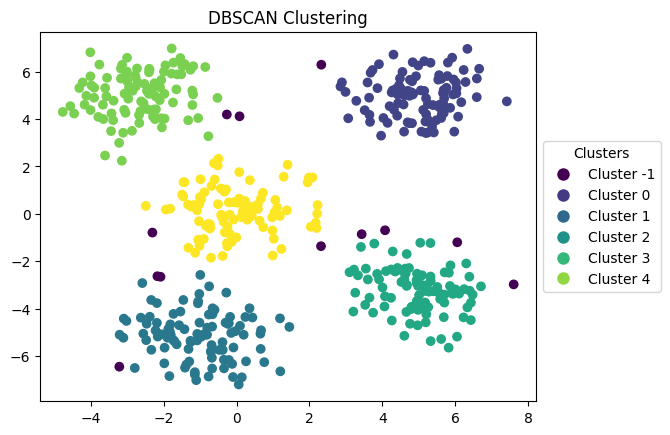

best_params: {'eps': 0.9, 'min_samples': 6}


In [10]:
test_data = np.concatenate([
    np.random.randn(100, 2) + np.array([5, 5]),
    np.random.randn(100, 2) + np.array([-1, -5]),
    np.random.randn(100, 2) + np.array([5, -3]),
    np.random.randn(100, 2) + np.array([-2.5, 5]),
    np.random.randn(100, 2) + np.array([0, 0]),
])
best_params, labels = auto_dbscan(data=test_data)
print(f'best_params: {best_params}')